In [7]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

os.chdir("/Users/nsy/Documents/Grad2/5671/HW5")
credit_X_df = pd.read_csv("training_features.csv",header =0)
credit_X_df.head()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker
0,A12,24,A34,A410,11938,A61,A73,2,A93,A102,3,A123,39,A143,A152,2,A174,2,A192,A201
1,A14,36,A32,A46,1819,A61,A73,4,A93,A101,4,A124,37,A142,A153,1,A173,1,A192,A201
2,A11,15,A34,A42,1478,A61,A75,4,A93,A101,4,A123,44,A143,A152,2,A173,2,A192,A201
3,A14,24,A34,A43,1516,A64,A73,4,A92,A101,1,A121,43,A143,A152,2,A172,1,A191,A201
4,A11,9,A32,A42,2136,A61,A73,3,A93,A101,2,A121,25,A143,A152,1,A173,1,A191,A201


In [8]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

credit_y_df = pd.read_csv("training_labels.csv",header =0)

# target variable distribution
credit_y_df.groupby(['status'])[['status']].count()

,status
status,
-1,214
1,486


In [9]:
credit_all_df = pd.concat([credit_X_df.reset_index(drop=True), credit_y_df], axis=1) 
credit_all_df.head()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A12,24,A34,A410,11938,A61,A73,2,A93,A102,...,A123,39,A143,A152,2,A174,2,A192,A201,-1
1,A14,36,A32,A46,1819,A61,A73,4,A93,A101,...,A124,37,A142,A153,1,A173,1,A192,A201,-1
2,A11,15,A34,A42,1478,A61,A75,4,A93,A101,...,A123,44,A143,A152,2,A173,2,A192,A201,1
3,A14,24,A34,A43,1516,A64,A73,4,A92,A101,...,A121,43,A143,A152,2,A172,1,A191,A201,1
4,A11,9,A32,A42,2136,A61,A73,3,A93,A101,...,A121,25,A143,A152,1,A173,1,A191,A201,1


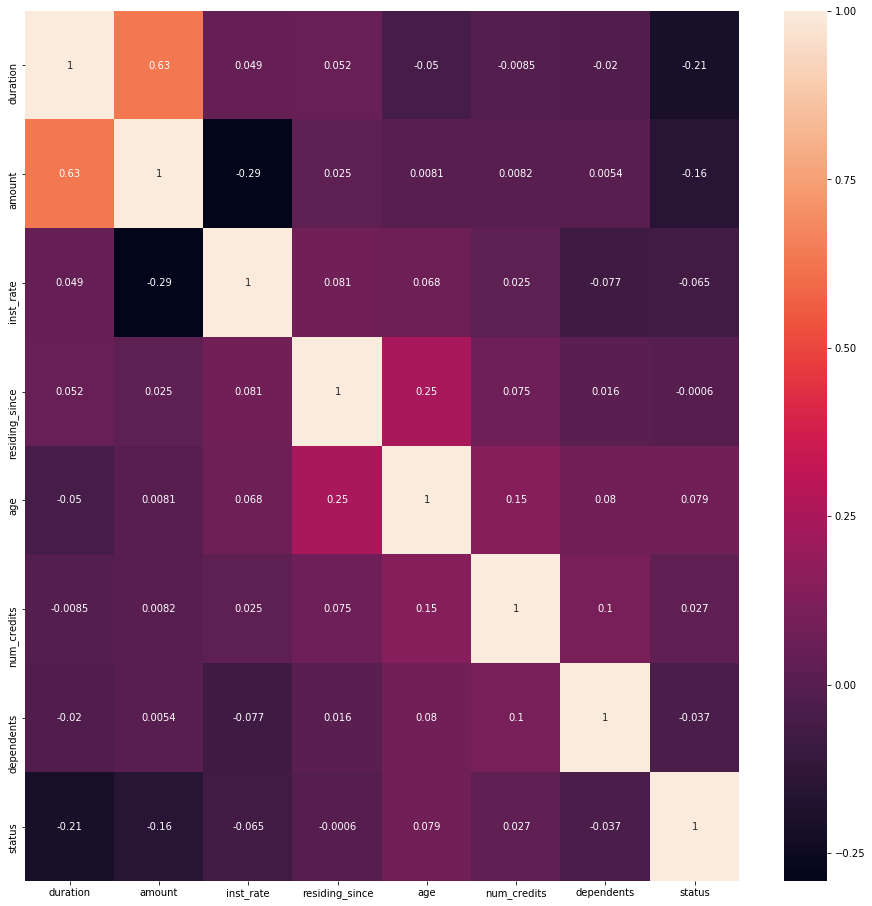

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = credit_all_df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr,annot = True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [11]:
cat_vars=['checkin_acc','credit_history','purpose','saving_acc','present_emp_since','personal_status','other_debtors',
          'property', 'inst_plans','housing','job', 'telephone', 'foreign_worker']

credit_X_df = pd.get_dummies(credit_X_df, columns = cat_vars)
credit_X_df.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,checkin_acc_A11,checkin_acc_A12,checkin_acc_A13,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,24,11938,2,3,39,2,2,0,1,0,...,1,0,0,0,0,1,0,1,1,0
1,36,1819,4,4,37,1,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0
2,15,1478,4,4,44,2,2,1,0,0,...,1,0,0,0,1,0,0,1,1,0
3,24,1516,4,1,43,2,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,9,2136,3,2,25,1,1,1,0,0,...,1,0,0,0,1,0,1,0,1,0


In [12]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(credit_X_df, credit_y_df, test_size=0.3, random_state=0)
X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_sample(X_train, y_train)
X_resampled, y_resampled = shuffle(X_resampled, y_resampled)

Using TensorFlow backend.


In [13]:
from scipy.stats.stats import pearsonr
relevant_features = []
for i in range(len(X_resampled[0]) - 1): 
    thres = 0.1
    corr = pearsonr(y_resampled.flatten(),X_resampled[:,i])[0]
        
    if abs(corr) > thres:
        relevant_features.append(i)
    
relevant_features

[0, 7, 8, 10, 11, 12, 15, 17, 20, 21, 26, 29, 30, 32, 43, 50, 57, 58]

In [14]:
X_resampled = X_resampled[:,relevant_features]

In [15]:
X_test = X_test.iloc[:,relevant_features]

In [16]:
from sklearn.preprocessing import normalize
X_resampled = normalize(X_resampled)
X_test = normalize(X_test)

In [17]:
import csv
import numpy as np
import math
#import cvxopt as opt
#from cvxopt import matrix, solvers
from sklearn.svm import SVC

def kernel(XTest, XTrain, type = 0, sigma = 0):
    # Write your code here to return the kernel, type may be 0, 1, 2 for different kernel types
    def linear(XTest, XTrain):
        K = SVC(kernel='linear')
        return K   
    def poly(XTest, XTrain):
        K = SVC(kernel = 'poly', degree = '')
        return K
    def Gaussian(XTest, XTrain):
        K = SVC(kernel ='rbf')
        return K
    switcher = {
        0:linear,
        1:poly,
        2:Gaussian
    }
    K = switcher[type](XTest, XTrain)
    return K

In [18]:
def predict(XTest, XTrain, yTrain, alpha):
    # Write your code here to return the intercept
    pred = (alpha * yTrain) @ kernal(XTest, XTrain, type = 0, sigma = 0) + intercept
    pred[pred < 0] = -1
    pred[pred >= 0] = 1
    return pred

In [ ]:
def intercept(XTest, XTrain, yTrain, alpha):
    # Write your code here to return the intercept
    Ns = alpha[alpha > 0].shape[0]
    alpha_zero = alpha[alpha < 0] = 0
    Diag = np.diag((alpha_zero * yTrain).reshape(alpha_zero.shape[0]))
    new = np.sum(yTrain - np.sum(Diag @ kernel(XTest, XTrain, type = 0, sigma = 0) @ alpha))
    b = np.sum(new)/Ns
    return b